#Imports

In [1]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install imageio
!pip install tqdm
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pickle
from google.colab import files
import imageio
from scipy import misc
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import random
from sklearn import metrics
import scipy
from google.colab import files

    100% |████████████████████████████████| 3.3MB 8.2MB/s 
    100% |████████████████████████████████| 51kB 2.1MB/s 


#Dataset

In [4]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#mobs.zip = https://drive.google.com/open?id=10D24ngLSQs2J9CxK84huEFnCgLdpU3le
!rm -r outputs
minimob = drive.CreateFile({'id':'10D24ngLSQs2J9CxK84huEFnCgLdpU3le'})
minimob.GetContentFile('mobs.zip')
!unzip mobs.zip
!mkdir mobs
!mv outputs mobs
#img_list = https://drive.google.com/open?id=1Ayqg1lzwbL-kV_c4YBvm_9-reZpCb89y
#img_list1 = https://drive.google.com/open?id=195QErJMxykP6SL14DRlg-PkcV2h-ILWG
img_list = drive.CreateFile({'id':'195QErJMxykP6SL14DRlg-PkcV2h-ILWG'})
img_list.GetContentFile('img_list')


rm: cannot remove 'outputs': No such file or directory
Archive:  mobs.zip
   creating: outputs/
   creating: outputs/draco_egg/
   creating: outputs/draco/
   creating: outputs/dr_basilisk3/
   creating: outputs/dr_basilisk2/
   creating: outputs/dr_basilisk1/
   creating: outputs/dokebi/
   creating: outputs/disguise/
   creating: outputs/dimik/
   creating: outputs/diabolic/
   creating: outputs/deviruchi/
   creating: outputs/deviling/
   creating: outputs/deviace/
   creating: outputs/detale/
   creating: outputs/desert_wolf_b/
   creating: outputs/desert_wolf/
   creating: outputs/deniro/
   creating: outputs/demon_pungus/
   creating: outputs/deleter_/
   creating: outputs/deleter/
   creating: outputs/deathword/
   creating: outputs/dark_snake_lord/
   creating: outputs/dark_priest/
   creating: outputs/dark_lord/
   creating: outputs/dark_illusion/
   creating: outputs/dark_frame/
   creating: outputs/dandelion/
   creating: outputs/dancing_dragon/
   creating: outputs/daehyon/


  inflating: outputs/dr_basilisk1/18/dr_basilisk1-5.png  
  inflating: outputs/dr_basilisk1/18/dr_basilisk1-4.png  
  inflating: outputs/dr_basilisk1/18/dr_basilisk1-3.png  
  inflating: outputs/dr_basilisk1/18/dr_basilisk1-2.png  
  inflating: outputs/dr_basilisk1/18/dr_basilisk1-1.png  
   creating: outputs/dr_basilisk1/17/
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-13.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-12.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-11.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-10.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-9.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-8.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-7.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-6.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-5.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-4.png  
  inflating: outputs/dr_basilisk1/17/dr_basilisk1-3.png  
  inflating: outputs/dr_basil


  inflating: outputs/demon_pungus/17/demon_pungus-16.png  
  inflating: outputs/demon_pungus/17/demon_pungus-15.png  
  inflating: outputs/demon_pungus/17/demon_pungus-14.png  
  inflating: outputs/demon_pungus/17/demon_pungus-13.png  
  inflating: outputs/demon_pungus/17/demon_pungus-12.png  
  inflating: outputs/demon_pungus/17/demon_pungus-11.png  
  inflating: outputs/demon_pungus/17/demon_pungus-10.png  
  inflating: outputs/demon_pungus/17/demon_pungus-9.png  
  inflating: outputs/demon_pungus/17/demon_pungus-8.png  
  inflating: outputs/demon_pungus/17/demon_pungus-7.png  
  inflating: outputs/demon_pungus/17/demon_pungus-6.png  
  inflating: outputs/demon_pungus/17/demon_pungus-5.png  
  inflating: outputs/demon_pungus/17/demon_pungus-4.png  
  inflating: outputs/demon_pungus/17/demon_pungus-3.png  
  inflating: outputs/demon_pungus/17/demon_pungus-2.png  
  inflating: outputs/demon_pungus/17/demon_pungus-1.png  
   creating: outputs/demon_pungus/10/
  inflating: outputs/demon

  inflating: outputs/dark_frame/17/dark_frame-5.png  
  inflating: outputs/dark_frame/17/dark_frame-4.png  
  inflating: outputs/dark_frame/17/dark_frame-3.png  
  inflating: outputs/dark_frame/17/dark_frame-2.png  
  inflating: outputs/dark_frame/17/dark_frame-1.png  
   creating: outputs/dark_frame/10/
  inflating: outputs/dark_frame/10/dark_frame-12.png  
  inflating: outputs/dark_frame/10/dark_frame-11.png  
  inflating: outputs/dark_frame/10/dark_frame-10.png  
  inflating: outputs/dark_frame/10/dark_frame-9.png  
  inflating: outputs/dark_frame/10/dark_frame-8.png  
  inflating: outputs/dark_frame/10/dark_frame-7.png  
  inflating: outputs/dark_frame/10/dark_frame-6.png  
  inflating: outputs/dark_frame/10/dark_frame-5.png  
  inflating: outputs/dark_frame/10/dark_frame-4.png  
  inflating: outputs/dark_frame/10/dark_frame-3.png  
  inflating: outputs/dark_frame/10/dark_frame-2.png  
  inflating: outputs/dark_frame/10/dark_frame-1.png  
   creating: outputs/dark_frame/9/
  inflat

  inflating: outputs/creamy/26/creamy-1.png  
   creating: outputs/creamy/25/
  inflating: outputs/creamy/25/creamy-35.png  
  inflating: outputs/creamy/25/creamy-34.png  
  inflating: outputs/creamy/25/creamy-33.png  
  inflating: outputs/creamy/25/creamy-32.png  
  inflating: outputs/creamy/25/creamy-31.png  
  inflating: outputs/creamy/25/creamy-30.png  
  inflating: outputs/creamy/25/creamy-29.png  
  inflating: outputs/creamy/25/creamy-28.png  
  inflating: outputs/creamy/25/creamy-27.png  
  inflating: outputs/creamy/25/creamy-26.png  
  inflating: outputs/creamy/25/creamy-25.png  
  inflating: outputs/creamy/25/creamy-24.png  
  inflating: outputs/creamy/25/creamy-23.png  
  inflating: outputs/creamy/25/creamy-22.png  
  inflating: outputs/creamy/25/creamy-21.png  
  inflating: outputs/creamy/25/creamy-20.png  
  inflating: outputs/creamy/25/creamy-19.png  
  inflating: outputs/creamy/25/creamy-18.png  
  inflating: outputs/creamy/25/creamy-17.png  
  inflating: outputs/creamy/2

  inflating: outputs/coelacanth_n/17/coelacanth_n-5.png  
  inflating: outputs/coelacanth_n/17/coelacanth_n-4.png  
  inflating: outputs/coelacanth_n/17/coelacanth_n-3.png  
  inflating: outputs/coelacanth_n/17/coelacanth_n-2.png  
 extracting: outputs/coelacanth_n/17/coelacanth_n-1.png  
   creating: outputs/coelacanth_n/10/
 extracting: outputs/coelacanth_n/10/coelacanth_n-12.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-11.png  
  inflating: outputs/coelacanth_n/10/coelacanth_n-10.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-9.png  
  inflating: outputs/coelacanth_n/10/coelacanth_n-8.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-7.png  
  inflating: outputs/coelacanth_n/10/coelacanth_n-6.png  
  inflating: outputs/coelacanth_n/10/coelacanth_n-5.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-4.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-3.png  
 extracting: outputs/coelacanth_n/10/coelacanth_n-2.png  
 extracting: outputs/coelacanth


  inflating: outputs/chepet/9/chepet-7.png  
  inflating: outputs/chepet/9/chepet-6.png  
  inflating: outputs/chepet/9/chepet-5.png  
  inflating: outputs/chepet/9/chepet-4.png  
  inflating: outputs/chepet/9/chepet-3.png  
  inflating: outputs/chepet/9/chepet-2.png  
  inflating: outputs/chepet/9/chepet-1.png  
   creating: outputs/chepet/2/
  inflating: outputs/chepet/2/chepet-8.png  
  inflating: outputs/chepet/2/chepet-7.png  
  inflating: outputs/chepet/2/chepet-6.png  
  inflating: outputs/chepet/2/chepet-5.png  
  inflating: outputs/chepet/2/chepet-4.png  
  inflating: outputs/chepet/2/chepet-3.png  
  inflating: outputs/chepet/2/chepet-2.png  
  inflating: outputs/chepet/2/chepet-1.png  
   creating: outputs/chepet/1/
  inflating: outputs/chepet/1/chepet-8.png  
  inflating: outputs/chepet/1/chepet-7.png  
  inflating: outputs/chepet/1/chepet-6.png  
  inflating: outputs/chepet/1/chepet-5.png  
  inflating: outputs/chepet/1/chepet-4.png  
  inflating: outputs/chepet/1/chepet-

  inflating: outputs/c_tower_manager/10/c_tower_manager-4.png  
  inflating: outputs/c_tower_manager/10/c_tower_manager-3.png  
 extracting: outputs/c_tower_manager/10/c_tower_manager-2.png  
 extracting: outputs/c_tower_manager/10/c_tower_manager-1.png  
   creating: outputs/c_tower_manager/9/
  inflating: outputs/c_tower_manager/9/c_tower_manager-16.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-15.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-14.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-13.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-12.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-11.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-10.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-9.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-8.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-7.png  
  inflating: outputs/c_tower_manager/9/c_tower_manager-6.png  
  in

  inflating: outputs/bloody_murderer/17/bloody_murderer-13.png  
  inflating: outputs/bloody_murderer/17/bloody_murderer-12.png  
  inflating: outputs/bloody_murderer/17/bloody_murderer-11.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-10.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-9.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-8.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-7.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-6.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-5.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-4.png  
 extracting: outputs/bloody_murderer/17/bloody_murderer-3.png  
  inflating: outputs/bloody_murderer/17/bloody_murderer-2.png  
  inflating: outputs/bloody_murderer/17/bloody_murderer-1.png  
   creating: outputs/bloody_murderer/10/
  inflating: outputs/bloody_murderer/10/bloody_murderer-16.png  
  inflating: outputs/bloody_murderer/10/bloody_murderer-15

   creating: outputs/banshee_master/10/
 extracting: outputs/banshee_master/10/banshee_master-6.png  
 extracting: outputs/banshee_master/10/banshee_master-5.png  
 extracting: outputs/banshee_master/10/banshee_master-4.png  
 extracting: outputs/banshee_master/10/banshee_master-3.png  
 extracting: outputs/banshee_master/10/banshee_master-2.png  
 extracting: outputs/banshee_master/10/banshee_master-1.png  
   creating: outputs/banshee_master/9/
 extracting: outputs/banshee_master/9/banshee_master-6.png  
 extracting: outputs/banshee_master/9/banshee_master-5.png  
 extracting: outputs/banshee_master/9/banshee_master-4.png  
 extracting: outputs/banshee_master/9/banshee_master-3.png  
 extracting: outputs/banshee_master/9/banshee_master-2.png  
 extracting: outputs/banshee_master/9/banshee_master-1.png  
   creating: outputs/banshee_master/2/
 extracting: outputs/banshee_master/2/banshee_master-6.png  
 extracting: outputs/banshee_master/2/banshee_master-5.png  
 extracting: outputs/b


   creating: outputs/argiope/1/
  inflating: outputs/argiope/1/argiope-23.png  
  inflating: outputs/argiope/1/argiope-22.png  
  inflating: outputs/argiope/1/argiope-21.png  
  inflating: outputs/argiope/1/argiope-20.png  
  inflating: outputs/argiope/1/argiope-19.png  
  inflating: outputs/argiope/1/argiope-18.png  
  inflating: outputs/argiope/1/argiope-17.png  
  inflating: outputs/argiope/1/argiope-16.png  
  inflating: outputs/argiope/1/argiope-15.png  
  inflating: outputs/argiope/1/argiope-14.png  
  inflating: outputs/argiope/1/argiope-13.png  
  inflating: outputs/argiope/1/argiope-12.png  
  inflating: outputs/argiope/1/argiope-11.png  
  inflating: outputs/argiope/1/argiope-10.png  
  inflating: outputs/argiope/1/argiope-9.png  
  inflating: outputs/argiope/1/argiope-8.png  
  inflating: outputs/argiope/1/argiope-7.png  
  inflating: outputs/argiope/1/argiope-6.png  
  inflating: outputs/argiope/1/argiope-5.png  
  inflating: outputs/argiope/1/argiope-4.png  
  inflating: 


 extracting: outputs/antonio/2/antonio-10.png  
 extracting: outputs/antonio/2/antonio-9.png  
 extracting: outputs/antonio/2/antonio-8.png  
 extracting: outputs/antonio/2/antonio-7.png  
 extracting: outputs/antonio/2/antonio-6.png  
 extracting: outputs/antonio/2/antonio-5.png  
 extracting: outputs/antonio/2/antonio-4.png  
 extracting: outputs/antonio/2/antonio-3.png  
 extracting: outputs/antonio/2/antonio-2.png  
 extracting: outputs/antonio/2/antonio-1.png  
   creating: outputs/antonio/1/
  inflating: outputs/antonio/1/antonio-28.png  
  inflating: outputs/antonio/1/antonio-27.png  
  inflating: outputs/antonio/1/antonio-26.png  
  inflating: outputs/antonio/1/antonio-25.png  
  inflating: outputs/antonio/1/antonio-24.png  
  inflating: outputs/antonio/1/antonio-23.png  
  inflating: outputs/antonio/1/antonio-22.png  
  inflating: outputs/antonio/1/antonio-21.png  
  inflating: outputs/antonio/1/antonio-20.png  
  inflating: outputs/antonio/1/antonio-19.png  
  inflating: out

 extracting: outputs/ancient_tree/17/ancient_tree-7.png  
  inflating: outputs/ancient_tree/17/ancient_tree-6.png  
  inflating: outputs/ancient_tree/17/ancient_tree-5.png  
  inflating: outputs/ancient_tree/17/ancient_tree-4.png  
  inflating: outputs/ancient_tree/17/ancient_tree-3.png  
  inflating: outputs/ancient_tree/17/ancient_tree-2.png  
  inflating: outputs/ancient_tree/17/ancient_tree-1.png  
   creating: outputs/ancient_tree/10/
  inflating: outputs/ancient_tree/10/ancient_tree-6.png  
 extracting: outputs/ancient_tree/10/ancient_tree-5.png  
 extracting: outputs/ancient_tree/10/ancient_tree-4.png  
 extracting: outputs/ancient_tree/10/ancient_tree-3.png  
 extracting: outputs/ancient_tree/10/ancient_tree-2.png  
 extracting: outputs/ancient_tree/10/ancient_tree-1.png  
   creating: outputs/ancient_tree/9/
 extracting: outputs/ancient_tree/9/ancient_tree-6.png  
 extracting: outputs/ancient_tree/9/ancient_tree-5.png  
 extracting: outputs/ancient_tree/9/ancient_tree-4.png  



  inflating: outputs/alnoldi/18/alnoldi-9.png  
  inflating: outputs/alnoldi/18/alnoldi-8.png  
  inflating: outputs/alnoldi/18/alnoldi-7.png  
  inflating: outputs/alnoldi/18/alnoldi-6.png  
  inflating: outputs/alnoldi/18/alnoldi-5.png  
  inflating: outputs/alnoldi/18/alnoldi-4.png  
  inflating: outputs/alnoldi/18/alnoldi-3.png  
  inflating: outputs/alnoldi/18/alnoldi-2.png  
  inflating: outputs/alnoldi/18/alnoldi-1.png  
   creating: outputs/alnoldi/17/
  inflating: outputs/alnoldi/17/alnoldi-13.png  
  inflating: outputs/alnoldi/17/alnoldi-12.png  
  inflating: outputs/alnoldi/17/alnoldi-11.png  
  inflating: outputs/alnoldi/17/alnoldi-10.png  
  inflating: outputs/alnoldi/17/alnoldi-9.png  
  inflating: outputs/alnoldi/17/alnoldi-8.png  
  inflating: outputs/alnoldi/17/alnoldi-7.png  
  inflating: outputs/alnoldi/17/alnoldi-6.png  
  inflating: outputs/alnoldi/17/alnoldi-5.png  
  inflating: outputs/alnoldi/17/alnoldi-4.png  
  inflating: outputs/alnoldi/17/alnoldi-3.png  
  


  inflating: outputs/acidus_/17/acidus_-2.png  
  inflating: outputs/acidus_/17/acidus_-1.png  
   creating: outputs/acidus_/10/
  inflating: outputs/acidus_/10/acidus_-8.png  
  inflating: outputs/acidus_/10/acidus_-7.png  
  inflating: outputs/acidus_/10/acidus_-6.png  
  inflating: outputs/acidus_/10/acidus_-5.png  
  inflating: outputs/acidus_/10/acidus_-4.png  
  inflating: outputs/acidus_/10/acidus_-3.png  
  inflating: outputs/acidus_/10/acidus_-2.png  
  inflating: outputs/acidus_/10/acidus_-1.png  
   creating: outputs/acidus_/9/
  inflating: outputs/acidus_/9/acidus_-8.png  
  inflating: outputs/acidus_/9/acidus_-7.png  
  inflating: outputs/acidus_/9/acidus_-6.png  
  inflating: outputs/acidus_/9/acidus_-5.png  
  inflating: outputs/acidus_/9/acidus_-4.png  
  inflating: outputs/acidus_/9/acidus_-3.png  
  inflating: outputs/acidus_/9/acidus_-2.png  
  inflating: outputs/acidus_/9/acidus_-1.png  
   creating: outputs/acidus_/2/
  inflating: outputs/acidus_/2/acidus_-8.png  


  inflating: outputs/hunter_fly/2/hunter_fly-7.png  
  inflating: outputs/hunter_fly/2/hunter_fly-6.png  
  inflating: outputs/hunter_fly/2/hunter_fly-5.png  
  inflating: outputs/hunter_fly/2/hunter_fly-4.png  
  inflating: outputs/hunter_fly/2/hunter_fly-3.png  
  inflating: outputs/hunter_fly/2/hunter_fly-2.png  
  inflating: outputs/hunter_fly/2/hunter_fly-1.png  
   creating: outputs/hunter_fly/1/
  inflating: outputs/hunter_fly/1/hunter_fly-12.png  
  inflating: outputs/hunter_fly/1/hunter_fly-11.png  
  inflating: outputs/hunter_fly/1/hunter_fly-10.png  
  inflating: outputs/hunter_fly/1/hunter_fly-9.png  
  inflating: outputs/hunter_fly/1/hunter_fly-8.png  
  inflating: outputs/hunter_fly/1/hunter_fly-7.png  
  inflating: outputs/hunter_fly/1/hunter_fly-6.png  
  inflating: outputs/hunter_fly/1/hunter_fly-5.png  
  inflating: outputs/hunter_fly/1/hunter_fly-4.png  
  inflating: outputs/hunter_fly/1/hunter_fly-3.png  
  inflating: outputs/hunter_fly/1/hunter_fly-2.png  
  infla

  inflating: outputs/high_orc/2/high_orc-6.png  
  inflating: outputs/high_orc/2/high_orc-5.png  
  inflating: outputs/high_orc/2/high_orc-4.png  
  inflating: outputs/high_orc/2/high_orc-3.png  
  inflating: outputs/high_orc/2/high_orc-2.png  
  inflating: outputs/high_orc/2/high_orc-1.png  
   creating: outputs/high_orc/1/
  inflating: outputs/high_orc/1/high_orc-17.png  
  inflating: outputs/high_orc/1/high_orc-16.png  
  inflating: outputs/high_orc/1/high_orc-15.png  
  inflating: outputs/high_orc/1/high_orc-14.png  
  inflating: outputs/high_orc/1/high_orc-13.png  
  inflating: outputs/high_orc/1/high_orc-12.png  
  inflating: outputs/high_orc/1/high_orc-11.png  
  inflating: outputs/high_orc/1/high_orc-10.png  
  inflating: outputs/high_orc/1/high_orc-9.png  
  inflating: outputs/high_orc/1/high_orc-8.png  
  inflating: outputs/high_orc/1/high_orc-7.png  
  inflating: outputs/high_orc/1/high_orc-6.png  
  inflating: outputs/high_orc/1/high_orc-5.png  
  inflating: outputs/high_or

ts/hardrock_mommoth/17/
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-11.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-10.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-9.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-8.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-7.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-6.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-5.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-4.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-3.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-2.png  
  inflating: outputs/hardrock_mommoth/17/hardrock_mommoth-1.png  
   creating: outputs/hardrock_mommoth/10/
 extracting: outputs/hardrock_mommoth/10/hardrock_mommoth-8.png  
 extracting: outputs/hardrock_mommoth/10/hardrock_mommoth-7.png  
 extracting: outputs/hardrock_mommoth/10/hardrock_mommoth-6.png  
 extract

  inflating: outputs/grand_peco/2/grand_peco-46.png  
  inflating: outputs/grand_peco/2/grand_peco-45.png  
  inflating: outputs/grand_peco/2/grand_peco-44.png  
  inflating: outputs/grand_peco/2/grand_peco-43.png  
  inflating: outputs/grand_peco/2/grand_peco-42.png  
  inflating: outputs/grand_peco/2/grand_peco-41.png  
  inflating: outputs/grand_peco/2/grand_peco-40.png  
  inflating: outputs/grand_peco/2/grand_peco-39.png  
  inflating: outputs/grand_peco/2/grand_peco-38.png  
  inflating: outputs/grand_peco/2/grand_peco-37.png  
  inflating: outputs/grand_peco/2/grand_peco-36.png  
  inflating: outputs/grand_peco/2/grand_peco-35.png  
  inflating: outputs/grand_peco/2/grand_peco-34.png  
  inflating: outputs/grand_peco/2/grand_peco-33.png  
  inflating: outputs/grand_peco/2/grand_peco-32.png  
  inflating: outputs/grand_peco/2/grand_peco-31.png  
  inflating: outputs/grand_peco/2/grand_peco-30.png  
  inflating: outputs/grand_peco/2/grand_peco-29.png  
  inflating: outputs/grand_p


  inflating: outputs/goblin_leader/1/goblin_leader-18.png  
  inflating: outputs/goblin_leader/1/goblin_leader-17.png  
  inflating: outputs/goblin_leader/1/goblin_leader-16.png  
  inflating: outputs/goblin_leader/1/goblin_leader-15.png  
  inflating: outputs/goblin_leader/1/goblin_leader-14.png  
  inflating: outputs/goblin_leader/1/goblin_leader-13.png  
  inflating: outputs/goblin_leader/1/goblin_leader-12.png  
  inflating: outputs/goblin_leader/1/goblin_leader-11.png  
  inflating: outputs/goblin_leader/1/goblin_leader-10.png  
  inflating: outputs/goblin_leader/1/goblin_leader-9.png  
  inflating: outputs/goblin_leader/1/goblin_leader-8.png  
  inflating: outputs/goblin_leader/1/goblin_leader-7.png  
  inflating: outputs/goblin_leader/1/goblin_leader-6.png  
  inflating: outputs/goblin_leader/1/goblin_leader-5.png  
  inflating: outputs/goblin_leader/1/goblin_leader-4.png  
  inflating: outputs/goblin_leader/1/goblin_leader-3.png  
  inflating: outputs/goblin_leader/1/goblin_le


  inflating: outputs/gig/9/gig-3.png  
  inflating: outputs/gig/9/gig-2.png  
  inflating: outputs/gig/9/gig-1.png  
   creating: outputs/gig/2/
  inflating: outputs/gig/2/gig-8.png  
  inflating: outputs/gig/2/gig-7.png  
  inflating: outputs/gig/2/gig-6.png  
  inflating: outputs/gig/2/gig-5.png  
  inflating: outputs/gig/2/gig-4.png  
  inflating: outputs/gig/2/gig-3.png  
  inflating: outputs/gig/2/gig-2.png  
  inflating: outputs/gig/2/gig-1.png  
   creating: outputs/gig/1/
  inflating: outputs/gig/1/gig-8.png  
  inflating: outputs/gig/1/gig-7.png  
  inflating: outputs/gig/1/gig-6.png  
  inflating: outputs/gig/1/gig-5.png  
  inflating: outputs/gig/1/gig-4.png  
  inflating: outputs/gig/1/gig-3.png  
  inflating: outputs/gig/1/gig-2.png  
  inflating: outputs/gig/1/gig-1.png  
   creating: outputs/giearth/0/
   creating: outputs/giearth/26/
  inflating: outputs/giearth/26/giearth-12.png  
  inflating: outputs/giearth/26/giearth-11.png  
  inflating: outputs/giearth/26/giearth


  inflating: outputs/gazeti/17/gazeti-3.png  
  inflating: outputs/gazeti/17/gazeti-2.png  
  inflating: outputs/gazeti/17/gazeti-1.png  
   creating: outputs/gazeti/10/
  inflating: outputs/gazeti/10/gazeti-8.png  
  inflating: outputs/gazeti/10/gazeti-7.png  
  inflating: outputs/gazeti/10/gazeti-6.png  
  inflating: outputs/gazeti/10/gazeti-5.png  
  inflating: outputs/gazeti/10/gazeti-4.png  
  inflating: outputs/gazeti/10/gazeti-3.png  
  inflating: outputs/gazeti/10/gazeti-2.png  
  inflating: outputs/gazeti/10/gazeti-1.png  
   creating: outputs/gazeti/9/
  inflating: outputs/gazeti/9/gazeti-8.png  
  inflating: outputs/gazeti/9/gazeti-7.png  
  inflating: outputs/gazeti/9/gazeti-6.png  
  inflating: outputs/gazeti/9/gazeti-5.png  
  inflating: outputs/gazeti/9/gazeti-4.png  
  inflating: outputs/gazeti/9/gazeti-3.png  
  inflating: outputs/gazeti/9/gazeti-2.png  
  inflating: outputs/gazeti/9/gazeti-1.png  
   creating: outputs/gazeti/2/
  inflating: outputs/gazeti/2/gazeti-8.


  inflating: outputs/gajomart/17/gajomart-14.png  
  inflating: outputs/gajomart/17/gajomart-13.png  
  inflating: outputs/gajomart/17/gajomart-12.png  
  inflating: outputs/gajomart/17/gajomart-11.png  
  inflating: outputs/gajomart/17/gajomart-10.png  
  inflating: outputs/gajomart/17/gajomart-9.png  
  inflating: outputs/gajomart/17/gajomart-8.png  
  inflating: outputs/gajomart/17/gajomart-7.png  
  inflating: outputs/gajomart/17/gajomart-6.png  
  inflating: outputs/gajomart/17/gajomart-5.png  
  inflating: outputs/gajomart/17/gajomart-4.png  
  inflating: outputs/gajomart/17/gajomart-3.png  
  inflating: outputs/gajomart/17/gajomart-2.png  
  inflating: outputs/gajomart/17/gajomart-1.png  
   creating: outputs/gajomart/10/
  inflating: outputs/gajomart/10/gajomart-12.png  
  inflating: outputs/gajomart/10/gajomart-11.png  
  inflating: outputs/gajomart/10/gajomart-10.png  
  inflating: outputs/gajomart/10/gajomart-9.png  
  inflating: outputs/gajomart/10/gajomart-8.png  
  infla


   creating: outputs/fallingbishop/25/
 extracting: outputs/fallingbishop/25/fallingbishop-5.png  
 extracting: outputs/fallingbishop/25/fallingbishop-4.png  
 extracting: outputs/fallingbishop/25/fallingbishop-3.png  
 extracting: outputs/fallingbishop/25/fallingbishop-2.png  
  inflating: outputs/fallingbishop/25/fallingbishop-1.png  
   creating: outputs/fallingbishop/18/
  inflating: outputs/fallingbishop/18/fallingbishop-9.png  
  inflating: outputs/fallingbishop/18/fallingbishop-8.png  
  inflating: outputs/fallingbishop/18/fallingbishop-7.png  
 extracting: outputs/fallingbishop/18/fallingbishop-6.png  
 extracting: outputs/fallingbishop/18/fallingbishop-5.png  
 extracting: outputs/fallingbishop/18/fallingbishop-4.png  
  inflating: outputs/fallingbishop/18/fallingbishop-3.png  
 extracting: outputs/fallingbishop/18/fallingbishop-2.png  
 extracting: outputs/fallingbishop/18/fallingbishop-1.png  
   creating: outputs/fallingbishop/17/
 extracting: outputs/fallingbishop/17/fall

  inflating: outputs/executioner/2/executioner-1.png  
   creating: outputs/executioner/1/
  inflating: outputs/executioner/1/executioner-6.png  
  inflating: outputs/executioner/1/executioner-5.png  
  inflating: outputs/executioner/1/executioner-4.png  
  inflating: outputs/executioner/1/executioner-3.png  
  inflating: outputs/executioner/1/executioner-2.png  
  inflating: outputs/executioner/1/executioner-1.png  
   creating: outputs/excavator_robot/0/
   creating: outputs/excavator_robot/26/
 extracting: outputs/excavator_robot/26/excavator_robot-5.png  
  inflating: outputs/excavator_robot/26/excavator_robot-4.png  
  inflating: outputs/excavator_robot/26/excavator_robot-3.png  
  inflating: outputs/excavator_robot/26/excavator_robot-2.png  
 extracting: outputs/excavator_robot/26/excavator_robot-1.png  
   creating: outputs/excavator_robot/25/
 extracting: outputs/excavator_robot/25/excavator_robot-5.png  
  inflating: outputs/excavator_robot/25/excavator_robot-4.png  
  inflati


   creating: outputs/elder/25/
 extracting: outputs/elder/25/elder-7.png  
  inflating: outputs/elder/25/elder-6.png  
 extracting: outputs/elder/25/elder-5.png  
  inflating: outputs/elder/25/elder-4.png  
  inflating: outputs/elder/25/elder-3.png  
  inflating: outputs/elder/25/elder-2.png  
 extracting: outputs/elder/25/elder-1.png  
   creating: outputs/elder/18/
  inflating: outputs/elder/18/elder-24.png  
  inflating: outputs/elder/18/elder-23.png  
  inflating: outputs/elder/18/elder-22.png  
  inflating: outputs/elder/18/elder-21.png  
  inflating: outputs/elder/18/elder-20.png  
  inflating: outputs/elder/18/elder-19.png  
  inflating: outputs/elder/18/elder-18.png  
  inflating: outputs/elder/18/elder-17.png  
  inflating: outputs/elder/18/elder-16.png  
  inflating: outputs/elder/18/elder-15.png  
  inflating: outputs/elder/18/elder-14.png  
  inflating: outputs/elder/18/elder-13.png  
  inflating: outputs/elder/18/elder-12.png  
  inflating: outputs/elder/18/elder-11.png  


  inflating: outputs/eddga/18/eddga-23.png  
  inflating: outputs/eddga/18/eddga-22.png  
  inflating: outputs/eddga/18/eddga-21.png  
  inflating: outputs/eddga/18/eddga-20.png  
  inflating: outputs/eddga/18/eddga-19.png  
  inflating: outputs/eddga/18/eddga-18.png  
  inflating: outputs/eddga/18/eddga-17.png  
  inflating: outputs/eddga/18/eddga-16.png  
  inflating: outputs/eddga/18/eddga-15.png  
  inflating: outputs/eddga/18/eddga-14.png  
  inflating: outputs/eddga/18/eddga-13.png  
  inflating: outputs/eddga/18/eddga-12.png  
  inflating: outputs/eddga/18/eddga-11.png  
  inflating: outputs/eddga/18/eddga-10.png  
  inflating: outputs/eddga/18/eddga-9.png  
  inflating: outputs/eddga/18/eddga-8.png  
  inflating: outputs/eddga/18/eddga-7.png  
  inflating: outputs/eddga/18/eddga-6.png  
  inflating: outputs/eddga/18/eddga-5.png  
  inflating: outputs/eddga/18/eddga-4.png  
  inflating: outputs/eddga/18/eddga-3.png  
  inflating: outputs/eddga/18/eddga-2.png  
  inflating: outp


 extracting: outputs/dryad/17/dryad-6.png  
 extracting: outputs/dryad/17/dryad-5.png  
 extracting: outputs/dryad/17/dryad-4.png  
 extracting: outputs/dryad/17/dryad-3.png  
 extracting: outputs/dryad/17/dryad-2.png  
  inflating: outputs/dryad/17/dryad-1.png  
   creating: outputs/dryad/10/
   creating: outputs/dryad/9/
 extracting: outputs/dryad/9/dryad-12.png  
 extracting: outputs/dryad/9/dryad-11.png  
 extracting: outputs/dryad/9/dryad-10.png  
 extracting: outputs/dryad/9/dryad-9.png  
 extracting: outputs/dryad/9/dryad-8.png  
 extracting: outputs/dryad/9/dryad-7.png  
 extracting: outputs/dryad/9/dryad-6.png  
 extracting: outputs/dryad/9/dryad-5.png  
 extracting: outputs/dryad/9/dryad-4.png  
 extracting: outputs/dryad/9/dryad-3.png  
 extracting: outputs/dryad/9/dryad-2.png  
 extracting: outputs/dryad/9/dryad-1.png  
   creating: outputs/dryad/2/
   creating: outputs/dryad/1/
 extracting: outputs/dryad/1/dryad-12.png  
 extracting: outputs/dryad/1/dryad-11.png  
 extrac

  inflating: outputs/novus_/10/novus_-1.png  
   creating: outputs/novus_/9/
  inflating: outputs/novus_/9/novus_-8.png  
  inflating: outputs/novus_/9/novus_-7.png  
  inflating: outputs/novus_/9/novus_-6.png  
  inflating: outputs/novus_/9/novus_-5.png  
  inflating: outputs/novus_/9/novus_-4.png  
  inflating: outputs/novus_/9/novus_-3.png  
  inflating: outputs/novus_/9/novus_-2.png  
  inflating: outputs/novus_/9/novus_-1.png  
   creating: outputs/novus_/2/
  inflating: outputs/novus_/2/novus_-15.png  
  inflating: outputs/novus_/2/novus_-14.png  
  inflating: outputs/novus_/2/novus_-13.png  
  inflating: outputs/novus_/2/novus_-12.png  
  inflating: outputs/novus_/2/novus_-11.png  
  inflating: outputs/novus_/2/novus_-10.png  
  inflating: outputs/novus_/2/novus_-9.png  
  inflating: outputs/novus_/2/novus_-8.png  
  inflating: outputs/novus_/2/novus_-7.png  
  inflating: outputs/novus_/2/novus_-6.png  
  inflating: outputs/novus_/2/novus_-5.png  
  inflating: outputs/novus_/2/n

  inflating: outputs/mysteltainn/26/mysteltainn-4.png  
  inflating: outputs/mysteltainn/26/mysteltainn-3.png  
  inflating: outputs/mysteltainn/26/mysteltainn-2.png  
  inflating: outputs/mysteltainn/26/mysteltainn-1.png  
   creating: outputs/mysteltainn/25/
 extracting: outputs/mysteltainn/25/mysteltainn-4.png  
 extracting: outputs/mysteltainn/25/mysteltainn-3.png  
  inflating: outputs/mysteltainn/25/mysteltainn-2.png  
  inflating: outputs/mysteltainn/25/mysteltainn-1.png  
   creating: outputs/mysteltainn/18/
  inflating: outputs/mysteltainn/18/mysteltainn-12.png  
  inflating: outputs/mysteltainn/18/mysteltainn-11.png  
  inflating: outputs/mysteltainn/18/mysteltainn-10.png  
  inflating: outputs/mysteltainn/18/mysteltainn-9.png  
  inflating: outputs/mysteltainn/18/mysteltainn-8.png  
  inflating: outputs/mysteltainn/18/mysteltainn-7.png  
  inflating: outputs/mysteltainn/18/mysteltainn-6.png  
  inflating: outputs/mysteltainn/18/mysteltainn-5.png  
  inflating: outputs/mystel


  inflating: outputs/morocc_3/26/morocc_3-4.png  
  inflating: outputs/morocc_3/26/morocc_3-3.png  
  inflating: outputs/morocc_3/26/morocc_3-2.png  
  inflating: outputs/morocc_3/26/morocc_3-1.png  
   creating: outputs/morocc_3/25/
  inflating: outputs/morocc_3/25/morocc_3-5.png  
  inflating: outputs/morocc_3/25/morocc_3-4.png  
  inflating: outputs/morocc_3/25/morocc_3-3.png  
  inflating: outputs/morocc_3/25/morocc_3-2.png  
  inflating: outputs/morocc_3/25/morocc_3-1.png  
   creating: outputs/morocc_3/18/
  inflating: outputs/morocc_3/18/morocc_3-12.png  
  inflating: outputs/morocc_3/18/morocc_3-11.png  
  inflating: outputs/morocc_3/18/morocc_3-10.png  
  inflating: outputs/morocc_3/18/morocc_3-9.png  
  inflating: outputs/morocc_3/18/morocc_3-8.png  
  inflating: outputs/morocc_3/18/morocc_3-7.png  
  inflating: outputs/morocc_3/18/morocc_3-6.png  
  inflating: outputs/morocc_3/18/morocc_3-5.png  
  inflating: outputs/morocc_3/18/morocc_3-4.png  
  inflating: outputs/morocc_


  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-11.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-10.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-9.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-8.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-7.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-6.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-5.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-4.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-3.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-2.png  
  inflating: outputs/miyabi_ningyo/18/miyabi_ningyo-1.png  
   creating: outputs/miyabi_ningyo/17/
  inflating: outputs/miyabi_ningyo/17/miyabi_ningyo-22.png  
  inflating: outputs/miyabi_ningyo/17/miyabi_ningyo-21.png  
  inflating: outputs/miyabi_ningyo/17/miyabi_ningyo-20.png  
  inflating: outputs/miyabi_ningyo/17/miyabi_ningyo-19.png  
  inflating: outputs/miyabi_ningyo/17/miyabi_ningyo-18

  inflating: outputs/metaller/9/metaller-6.png  
  inflating: outputs/metaller/9/metaller-5.png  
  inflating: outputs/metaller/9/metaller-4.png  
  inflating: outputs/metaller/9/metaller-3.png  
  inflating: outputs/metaller/9/metaller-2.png  
  inflating: outputs/metaller/9/metaller-1.png  
   creating: outputs/metaller/2/
  inflating: outputs/metaller/2/metaller-22.png  
  inflating: outputs/metaller/2/metaller-21.png  
  inflating: outputs/metaller/2/metaller-20.png  
  inflating: outputs/metaller/2/metaller-19.png  
  inflating: outputs/metaller/2/metaller-18.png  
  inflating: outputs/metaller/2/metaller-17.png  
  inflating: outputs/metaller/2/metaller-16.png  
  inflating: outputs/metaller/2/metaller-15.png  
  inflating: outputs/metaller/2/metaller-14.png  
  inflating: outputs/metaller/2/metaller-13.png  
  inflating: outputs/metaller/2/metaller-12.png  
  inflating: outputs/metaller/2/metaller-11.png  
  inflating: outputs/metaller/2/metaller-10.png  
  inflating: outputs/me


   creating: outputs/md_octopus_leg/25/
  inflating: outputs/md_octopus_leg/25/md_octopus_leg-5.png  
  inflating: outputs/md_octopus_leg/25/md_octopus_leg-4.png  
  inflating: outputs/md_octopus_leg/25/md_octopus_leg-3.png  
  inflating: outputs/md_octopus_leg/25/md_octopus_leg-2.png  
  inflating: outputs/md_octopus_leg/25/md_octopus_leg-1.png  
   creating: outputs/md_octopus_leg/18/
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-10.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-9.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-8.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-7.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-6.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-5.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-4.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-3.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_leg-2.png  
  inflating: outputs/md_octopus_leg/18/md_octopus_

  inflating: outputs/marse/18/marse-5.png  
  inflating: outputs/marse/18/marse-4.png  
  inflating: outputs/marse/18/marse-3.png  
  inflating: outputs/marse/18/marse-2.png  
  inflating: outputs/marse/18/marse-1.png  
   creating: outputs/marse/17/
  inflating: outputs/marse/17/marse-21.png  
  inflating: outputs/marse/17/marse-20.png  
  inflating: outputs/marse/17/marse-19.png  
  inflating: outputs/marse/17/marse-18.png  
  inflating: outputs/marse/17/marse-17.png  
  inflating: outputs/marse/17/marse-16.png  
  inflating: outputs/marse/17/marse-15.png  
  inflating: outputs/marse/17/marse-14.png  
  inflating: outputs/marse/17/marse-13.png  
  inflating: outputs/marse/17/marse-12.png  
  inflating: outputs/marse/17/marse-11.png  
  inflating: outputs/marse/17/marse-10.png  
  inflating: outputs/marse/17/marse-9.png  
  inflating: outputs/marse/17/marse-8.png  
  inflating: outputs/marse/17/marse-7.png  
  inflating: outputs/marse/17/marse-6.png  
  inflating: outputs/marse/17/mar


  inflating: outputs/mangkukulam/18/mangkukulam-4.png  
  inflating: outputs/mangkukulam/18/mangkukulam-3.png  
  inflating: outputs/mangkukulam/18/mangkukulam-2.png  
  inflating: outputs/mangkukulam/18/mangkukulam-1.png  
   creating: outputs/mangkukulam/17/
  inflating: outputs/mangkukulam/17/mangkukulam-7.png  
  inflating: outputs/mangkukulam/17/mangkukulam-6.png  
  inflating: outputs/mangkukulam/17/mangkukulam-5.png  
  inflating: outputs/mangkukulam/17/mangkukulam-4.png  
  inflating: outputs/mangkukulam/17/mangkukulam-3.png  
  inflating: outputs/mangkukulam/17/mangkukulam-2.png  
  inflating: outputs/mangkukulam/17/mangkukulam-1.png  
   creating: outputs/mangkukulam/10/
  inflating: outputs/mangkukulam/10/mangkukulam-8.png  
  inflating: outputs/mangkukulam/10/mangkukulam-7.png  
  inflating: outputs/mangkukulam/10/mangkukulam-6.png  
  inflating: outputs/mangkukulam/10/mangkukulam-5.png  
  inflating: outputs/mangkukulam/10/mangkukulam-4.png  
  inflating: outputs/mangkuku


  inflating: outputs/luciola_vespa/17/luciola_vespa-3.png  
  inflating: outputs/luciola_vespa/17/luciola_vespa-2.png  
  inflating: outputs/luciola_vespa/17/luciola_vespa-1.png  
   creating: outputs/luciola_vespa/10/
  inflating: outputs/luciola_vespa/10/luciola_vespa-12.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-11.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-10.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-9.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-8.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-7.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-6.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-5.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-4.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-3.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-2.png  
  inflating: outputs/luciola_vespa/10/luciola_vespa-1.png  
   creating: outputs/luciola_vespa/9/
  inflating: output


  inflating: outputs/live_peach_tree/18/live_peach_tree-6.png  
  inflating: outputs/live_peach_tree/18/live_peach_tree-5.png  
  inflating: outputs/live_peach_tree/18/live_peach_tree-4.png  
  inflating: outputs/live_peach_tree/18/live_peach_tree-3.png  
  inflating: outputs/live_peach_tree/18/live_peach_tree-2.png  
  inflating: outputs/live_peach_tree/18/live_peach_tree-1.png  
   creating: outputs/live_peach_tree/17/
 extracting: outputs/live_peach_tree/17/live_peach_tree-14.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-13.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-12.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-11.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-10.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-9.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-8.png  
 extracting: outputs/live_peach_tree/17/live_peach_tree-7.png  
  inflating: outputs/live_peach_tree/17/live_peach_tree-6

 extracting: outputs/lady_tanee/18/lady_tanee-7.png  
 extracting: outputs/lady_tanee/18/lady_tanee-6.png  
 extracting: outputs/lady_tanee/18/lady_tanee-5.png  
 extracting: outputs/lady_tanee/18/lady_tanee-4.png  
 extracting: outputs/lady_tanee/18/lady_tanee-3.png  
 extracting: outputs/lady_tanee/18/lady_tanee-2.png  
 extracting: outputs/lady_tanee/18/lady_tanee-1.png  
   creating: outputs/lady_tanee/17/
 extracting: outputs/lady_tanee/17/lady_tanee-9.png  
 extracting: outputs/lady_tanee/17/lady_tanee-8.png  
 extracting: outputs/lady_tanee/17/lady_tanee-7.png  
 extracting: outputs/lady_tanee/17/lady_tanee-6.png  
 extracting: outputs/lady_tanee/17/lady_tanee-5.png  
 extracting: outputs/lady_tanee/17/lady_tanee-4.png  
 extracting: outputs/lady_tanee/17/lady_tanee-3.png  
 extracting: outputs/lady_tanee/17/lady_tanee-2.png  
  inflating: outputs/lady_tanee/17/lady_tanee-1.png  
   creating: outputs/lady_tanee/10/
 extracting: outputs/lady_tanee/10/lady_tanee-8.png  
 extractin


 extracting: outputs/knight_of_windstorm/9/knight_of_windstorm-2.png  
 extracting: outputs/knight_of_windstorm/9/knight_of_windstorm-1.png  
   creating: outputs/knight_of_windstorm/2/
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-14.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-13.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-12.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-11.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-10.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-9.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-8.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-7.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-6.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-5.png  
 extracting: outputs/knight_of_windstorm/2/knight_of_windstorm-4.png  
 extracting: outputs/knight


  inflating: outputs/karakasa/9/karakasa-9.png  
  inflating: outputs/karakasa/9/karakasa-8.png  
  inflating: outputs/karakasa/9/karakasa-7.png  
  inflating: outputs/karakasa/9/karakasa-6.png  
  inflating: outputs/karakasa/9/karakasa-5.png  
  inflating: outputs/karakasa/9/karakasa-4.png  
  inflating: outputs/karakasa/9/karakasa-3.png  
  inflating: outputs/karakasa/9/karakasa-2.png  
  inflating: outputs/karakasa/9/karakasa-1.png  
   creating: outputs/karakasa/2/
  inflating: outputs/karakasa/2/karakasa-20.png  
  inflating: outputs/karakasa/2/karakasa-19.png  
  inflating: outputs/karakasa/2/karakasa-18.png  
  inflating: outputs/karakasa/2/karakasa-17.png  
  inflating: outputs/karakasa/2/karakasa-16.png  
  inflating: outputs/karakasa/2/karakasa-15.png  
  inflating: outputs/karakasa/2/karakasa-14.png  
  inflating: outputs/karakasa/2/karakasa-13.png  
  inflating: outputs/karakasa/2/karakasa-12.png  
  inflating: outputs/karakasa/2/karakasa-11.png  
  inflating: outputs/kara

  inflating: outputs/incubus/1/incubus-6.png  
  inflating: outputs/incubus/1/incubus-5.png  
  inflating: outputs/incubus/1/incubus-4.png  
  inflating: outputs/incubus/1/incubus-3.png  
  inflating: outputs/incubus/1/incubus-2.png  
  inflating: outputs/incubus/1/incubus-1.png  
   creating: outputs/increase_soil/0/
   creating: outputs/increase_soil/26/
  inflating: outputs/increase_soil/26/increase_soil-8.png  
  inflating: outputs/increase_soil/26/increase_soil-7.png  
  inflating: outputs/increase_soil/26/increase_soil-6.png  
  inflating: outputs/increase_soil/26/increase_soil-5.png  
  inflating: outputs/increase_soil/26/increase_soil-4.png  
  inflating: outputs/increase_soil/26/increase_soil-3.png  
  inflating: outputs/increase_soil/26/increase_soil-2.png  
  inflating: outputs/increase_soil/26/increase_soil-1.png  
   creating: outputs/increase_soil/25/
  inflating: outputs/increase_soil/25/increase_soil-8.png  
  inflating: outputs/increase_soil/25/increase_soil-7.png  
  

  inflating: outputs/teddy_bear/18/teddy_bear-4.png  
  inflating: outputs/teddy_bear/18/teddy_bear-3.png  
  inflating: outputs/teddy_bear/18/teddy_bear-2.png  
  inflating: outputs/teddy_bear/18/teddy_bear-1.png  
   creating: outputs/teddy_bear/17/
  inflating: outputs/teddy_bear/17/teddy_bear-13.png  
  inflating: outputs/teddy_bear/17/teddy_bear-12.png  
  inflating: outputs/teddy_bear/17/teddy_bear-11.png  
  inflating: outputs/teddy_bear/17/teddy_bear-10.png  
  inflating: outputs/teddy_bear/17/teddy_bear-9.png  
  inflating: outputs/teddy_bear/17/teddy_bear-8.png  
  inflating: outputs/teddy_bear/17/teddy_bear-7.png  
  inflating: outputs/teddy_bear/17/teddy_bear-6.png  
  inflating: outputs/teddy_bear/17/teddy_bear-5.png  
  inflating: outputs/teddy_bear/17/teddy_bear-4.png  
  inflating: outputs/teddy_bear/17/teddy_bear-3.png  
  inflating: outputs/teddy_bear/17/teddy_bear-2.png  
  inflating: outputs/teddy_bear/17/teddy_bear-1.png  
   creating: outputs/teddy_bear/10/
   cre


 extracting: outputs/stone_shooter/9/stone_shooter-3.png  
 extracting: outputs/stone_shooter/9/stone_shooter-2.png  
 extracting: outputs/stone_shooter/9/stone_shooter-1.png  
   creating: outputs/stone_shooter/2/
  inflating: outputs/stone_shooter/2/stone_shooter-20.png  
  inflating: outputs/stone_shooter/2/stone_shooter-19.png  
  inflating: outputs/stone_shooter/2/stone_shooter-18.png  
  inflating: outputs/stone_shooter/2/stone_shooter-17.png  
 extracting: outputs/stone_shooter/2/stone_shooter-16.png  
 extracting: outputs/stone_shooter/2/stone_shooter-15.png  
 extracting: outputs/stone_shooter/2/stone_shooter-14.png  
 extracting: outputs/stone_shooter/2/stone_shooter-13.png  
 extracting: outputs/stone_shooter/2/stone_shooter-12.png  
 extracting: outputs/stone_shooter/2/stone_shooter-11.png  
 extracting: outputs/stone_shooter/2/stone_shooter-10.png  
 extracting: outputs/stone_shooter/2/stone_shooter-9.png  
  inflating: outputs/stone_shooter/2/stone_shooter-8.png  
 extra

   creating: outputs/soldier/26/
  inflating: outputs/soldier/26/soldier-7.png  
  inflating: outputs/soldier/26/soldier-6.png  
  inflating: outputs/soldier/26/soldier-5.png  
  inflating: outputs/soldier/26/soldier-4.png  
  inflating: outputs/soldier/26/soldier-3.png  
  inflating: outputs/soldier/26/soldier-2.png  
  inflating: outputs/soldier/26/soldier-1.png  
   creating: outputs/soldier/25/
  inflating: outputs/soldier/25/soldier-7.png  
  inflating: outputs/soldier/25/soldier-6.png  
  inflating: outputs/soldier/25/soldier-5.png  
  inflating: outputs/soldier/25/soldier-4.png  
  inflating: outputs/soldier/25/soldier-3.png  
  inflating: outputs/soldier/25/soldier-2.png  
  inflating: outputs/soldier/25/soldier-1.png  
   creating: outputs/soldier/18/
  inflating: outputs/soldier/18/soldier-15.png  
  inflating: outputs/soldier/18/soldier-14.png  
  inflating: outputs/soldier/18/soldier-13.png  
  inflating: outputs/soldier/18/soldier-12.png  
  inflating: outputs/soldier/18/s


  inflating: outputs/skel_worker/18/skel_worker-9.png  
  inflating: outputs/skel_worker/18/skel_worker-8.png  
  inflating: outputs/skel_worker/18/skel_worker-7.png  
  inflating: outputs/skel_worker/18/skel_worker-6.png  
  inflating: outputs/skel_worker/18/skel_worker-5.png  
  inflating: outputs/skel_worker/18/skel_worker-4.png  
  inflating: outputs/skel_worker/18/skel_worker-3.png  
  inflating: outputs/skel_worker/18/skel_worker-2.png  
  inflating: outputs/skel_worker/18/skel_worker-1.png  
   creating: outputs/skel_worker/17/
  inflating: outputs/skel_worker/17/skel_worker-10.png  
  inflating: outputs/skel_worker/17/skel_worker-9.png  
  inflating: outputs/skel_worker/17/skel_worker-8.png  
  inflating: outputs/skel_worker/17/skel_worker-7.png  
  inflating: outputs/skel_worker/17/skel_worker-6.png  
  inflating: outputs/skel_worker/17/skel_worker-5.png  
  inflating: outputs/skel_worker/17/skel_worker-4.png  
  inflating: outputs/skel_worker/17/skel_worker-3.png  
  inflati


 extracting: outputs/shinobi/1/shinobi-1.png  
   creating: outputs/shelter/0/
   creating: outputs/shelter/26/
  inflating: outputs/shelter/26/shelter-5.png  
 extracting: outputs/shelter/26/shelter-4.png  
 extracting: outputs/shelter/26/shelter-3.png  
 extracting: outputs/shelter/26/shelter-2.png  
 extracting: outputs/shelter/26/shelter-1.png  
   creating: outputs/shelter/25/
  inflating: outputs/shelter/25/shelter-5.png  
  inflating: outputs/shelter/25/shelter-4.png  
  inflating: outputs/shelter/25/shelter-3.png  
  inflating: outputs/shelter/25/shelter-2.png  
  inflating: outputs/shelter/25/shelter-1.png  
   creating: outputs/shelter/18/
  inflating: outputs/shelter/18/shelter-7.png  
  inflating: outputs/shelter/18/shelter-6.png  
  inflating: outputs/shelter/18/shelter-5.png  
  inflating: outputs/shelter/18/shelter-4.png  
  inflating: outputs/shelter/18/shelter-3.png  
  inflating: outputs/shelter/18/shelter-2.png  
  inflating: outputs/shelter/18/shelter-1.png  
   cr


  inflating: outputs/sasquatch/17/sasquatch-13.png  
  inflating: outputs/sasquatch/17/sasquatch-12.png  
  inflating: outputs/sasquatch/17/sasquatch-11.png  
  inflating: outputs/sasquatch/17/sasquatch-10.png  
  inflating: outputs/sasquatch/17/sasquatch-9.png  
  inflating: outputs/sasquatch/17/sasquatch-8.png  
  inflating: outputs/sasquatch/17/sasquatch-7.png  
  inflating: outputs/sasquatch/17/sasquatch-6.png  
  inflating: outputs/sasquatch/17/sasquatch-5.png  
  inflating: outputs/sasquatch/17/sasquatch-4.png  
  inflating: outputs/sasquatch/17/sasquatch-3.png  
  inflating: outputs/sasquatch/17/sasquatch-2.png  
  inflating: outputs/sasquatch/17/sasquatch-1.png  
   creating: outputs/sasquatch/10/
 extracting: outputs/sasquatch/10/sasquatch-14.png  
 extracting: outputs/sasquatch/10/sasquatch-13.png  
 extracting: outputs/sasquatch/10/sasquatch-12.png  
 extracting: outputs/sasquatch/10/sasquatch-11.png  
 extracting: outputs/sasquatch/10/sasquatch-10.png  
 extracting: output


  inflating: outputs/rotar_zairo/18/rotar_zairo-5.png  
  inflating: outputs/rotar_zairo/18/rotar_zairo-4.png  
  inflating: outputs/rotar_zairo/18/rotar_zairo-3.png  
  inflating: outputs/rotar_zairo/18/rotar_zairo-2.png  
  inflating: outputs/rotar_zairo/18/rotar_zairo-1.png  
   creating: outputs/rotar_zairo/17/
  inflating: outputs/rotar_zairo/17/rotar_zairo-42.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-41.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-40.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-39.png  
 extracting: outputs/rotar_zairo/17/rotar_zairo-38.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-37.png  
 extracting: outputs/rotar_zairo/17/rotar_zairo-36.png  
 extracting: outputs/rotar_zairo/17/rotar_zairo-35.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-34.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-33.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-32.png  
  inflating: outputs/rotar_zairo/17/rotar_zairo-31.png 

  inflating: outputs/rhyncho/26/rhyncho-3.png  
  inflating: outputs/rhyncho/26/rhyncho-2.png  
  inflating: outputs/rhyncho/26/rhyncho-1.png  
   creating: outputs/rhyncho/25/
  inflating: outputs/rhyncho/25/rhyncho-5.png  
  inflating: outputs/rhyncho/25/rhyncho-4.png  
  inflating: outputs/rhyncho/25/rhyncho-3.png  
  inflating: outputs/rhyncho/25/rhyncho-2.png  
  inflating: outputs/rhyncho/25/rhyncho-1.png  
   creating: outputs/rhyncho/18/
  inflating: outputs/rhyncho/18/rhyncho-11.png  
  inflating: outputs/rhyncho/18/rhyncho-10.png  
  inflating: outputs/rhyncho/18/rhyncho-9.png  
  inflating: outputs/rhyncho/18/rhyncho-8.png  
  inflating: outputs/rhyncho/18/rhyncho-7.png  
  inflating: outputs/rhyncho/18/rhyncho-6.png  
  inflating: outputs/rhyncho/18/rhyncho-5.png  
  inflating: outputs/rhyncho/18/rhyncho-4.png  
  inflating: outputs/rhyncho/18/rhyncho-3.png  
  inflating: outputs/rhyncho/18/rhyncho-2.png  
  inflating: outputs/rhyncho/18/rhyncho-1.png  
   creating: outputs


  inflating: outputs/raptice/17/raptice-3.png  
  inflating: outputs/raptice/17/raptice-2.png  
  inflating: outputs/raptice/17/raptice-1.png  
   creating: outputs/raptice/10/
  inflating: outputs/raptice/10/raptice-4.png  
  inflating: outputs/raptice/10/raptice-3.png  
  inflating: outputs/raptice/10/raptice-2.png  
  inflating: outputs/raptice/10/raptice-1.png  
   creating: outputs/raptice/9/
  inflating: outputs/raptice/9/raptice-4.png  
  inflating: outputs/raptice/9/raptice-3.png  
  inflating: outputs/raptice/9/raptice-2.png  
  inflating: outputs/raptice/9/raptice-1.png  
   creating: outputs/raptice/2/
   creating: outputs/raptice/1/
  inflating: outputs/raptice/1/raptice-4.png  
  inflating: outputs/raptice/1/raptice-3.png  
  inflating: outputs/raptice/1/raptice-2.png  
  inflating: outputs/raptice/1/raptice-1.png  
   creating: outputs/randgris/0/
   creating: outputs/randgris/26/
  inflating: outputs/randgris/26/randgris-5.png  
  inflating: outputs/randgris/26/randgris


  inflating: outputs/queen_scaraba/17/queen_scaraba-9.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-8.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-7.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-6.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-5.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-4.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-3.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-2.png  
  inflating: outputs/queen_scaraba/17/queen_scaraba-1.png  
   creating: outputs/queen_scaraba/10/
 extracting: outputs/queen_scaraba/10/queen_scaraba-18.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-17.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-16.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-15.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-14.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-13.png  
 extracting: outputs/queen_scaraba/10/queen_scaraba-12


  inflating: outputs/poison_spore/18/poison_spore-5.png  
  inflating: outputs/poison_spore/18/poison_spore-4.png  
  inflating: outputs/poison_spore/18/poison_spore-3.png  
  inflating: outputs/poison_spore/18/poison_spore-2.png  
  inflating: outputs/poison_spore/18/poison_spore-1.png  
   creating: outputs/poison_spore/17/
  inflating: outputs/poison_spore/17/poison_spore-14.png  
  inflating: outputs/poison_spore/17/poison_spore-13.png  
  inflating: outputs/poison_spore/17/poison_spore-12.png  
  inflating: outputs/poison_spore/17/poison_spore-11.png  
  inflating: outputs/poison_spore/17/poison_spore-10.png  
  inflating: outputs/poison_spore/17/poison_spore-9.png  
  inflating: outputs/poison_spore/17/poison_spore-8.png  
  inflating: outputs/poison_spore/17/poison_spore-7.png  
  inflating: outputs/poison_spore/17/poison_spore-6.png  
  inflating: outputs/poison_spore/17/poison_spore-5.png  
  inflating: outputs/poison_spore/17/poison_spore-4.png  
  inflating: outputs/poison_

ts/picky/2/
  inflating: outputs/picky/2/picky-18.png  
  inflating: outputs/picky/2/picky-17.png  
  inflating: outputs/picky/2/picky-16.png  
  inflating: outputs/picky/2/picky-15.png  
  inflating: outputs/picky/2/picky-14.png  
  inflating: outputs/picky/2/picky-13.png  
  inflating: outputs/picky/2/picky-12.png  
  inflating: outputs/picky/2/picky-11.png  
  inflating: outputs/picky/2/picky-10.png  
  inflating: outputs/picky/2/picky-9.png  
  inflating: outputs/picky/2/picky-8.png  
  inflating: outputs/picky/2/picky-7.png  
  inflating: outputs/picky/2/picky-6.png  
  inflating: outputs/picky/2/picky-5.png  
  inflating: outputs/picky/2/picky-4.png  
  inflating: outputs/picky/2/picky-3.png  
  inflating: outputs/picky/2/picky-2.png  
  inflating: outputs/picky/2/picky-1.png  
   creating: outputs/picky/1/
  inflating: outputs/picky/1/picky-18.png  
  inflating: outputs/picky/1/picky-17.png  
  inflating: outputs/picky/1/picky-16.png  
  inflating: outputs/picky/1/picky-15.png  

xtracting: outputs/pharaoh/10/pharaoh-5.png  
 extracting: outputs/pharaoh/10/pharaoh-4.png  
 extracting: outputs/pharaoh/10/pharaoh-3.png  
 extracting: outputs/pharaoh/10/pharaoh-2.png  
 extracting: outputs/pharaoh/10/pharaoh-1.png  
   creating: outputs/pharaoh/9/
 extracting: outputs/pharaoh/9/pharaoh-16.png  
 extracting: outputs/pharaoh/9/pharaoh-15.png  
 extracting: outputs/pharaoh/9/pharaoh-14.png  
 extracting: outputs/pharaoh/9/pharaoh-13.png  
 extracting: outputs/pharaoh/9/pharaoh-12.png  
 extracting: outputs/pharaoh/9/pharaoh-11.png  
 extracting: outputs/pharaoh/9/pharaoh-10.png  
 extracting: outputs/pharaoh/9/pharaoh-9.png  
 extracting: outputs/pharaoh/9/pharaoh-8.png  
 extracting: outputs/pharaoh/9/pharaoh-7.png  
 extracting: outputs/pharaoh/9/pharaoh-6.png  
 extracting: outputs/pharaoh/9/pharaoh-5.png  
 extracting: outputs/pharaoh/9/pharaoh-4.png  
 extracting: outputs/pharaoh/9/pharaoh-3.png  
 extracting: outputs/pharaoh/9/pharaoh-2.png  
 extracting: outpu

  inflating: outputs/pecopeco/26/pecopeco-3.png  
  inflating: outputs/pecopeco/26/pecopeco-2.png  
  inflating: outputs/pecopeco/26/pecopeco-1.png  
   creating: outputs/pecopeco/25/
  inflating: outputs/pecopeco/25/pecopeco-6.png  
  inflating: outputs/pecopeco/25/pecopeco-5.png  
  inflating: outputs/pecopeco/25/pecopeco-4.png  
  inflating: outputs/pecopeco/25/pecopeco-3.png  
  inflating: outputs/pecopeco/25/pecopeco-2.png  
  inflating: outputs/pecopeco/25/pecopeco-1.png  
   creating: outputs/pecopeco/18/
  inflating: outputs/pecopeco/18/pecopeco-9.png  
  inflating: outputs/pecopeco/18/pecopeco-8.png  
  inflating: outputs/pecopeco/18/pecopeco-7.png  
  inflating: outputs/pecopeco/18/pecopeco-6.png  
  inflating: outputs/pecopeco/18/pecopeco-5.png  
  inflating: outputs/pecopeco/18/pecopeco-4.png  
  inflating: outputs/pecopeco/18/pecopeco-3.png  
  inflating: outputs/pecopeco/18/pecopeco-2.png  
  inflating: outputs/pecopeco/18/pecopeco-1.png  
   creating: outputs/pecopeco/17


  inflating: outputs/owl_baron/17/owl_baron-21.png  
  inflating: outputs/owl_baron/17/owl_baron-20.png  
  inflating: outputs/owl_baron/17/owl_baron-19.png  
  inflating: outputs/owl_baron/17/owl_baron-18.png  
 extracting: outputs/owl_baron/17/owl_baron-17.png  
 extracting: outputs/owl_baron/17/owl_baron-16.png  
 extracting: outputs/owl_baron/17/owl_baron-15.png  
 extracting: outputs/owl_baron/17/owl_baron-14.png  
  inflating: outputs/owl_baron/17/owl_baron-13.png  
  inflating: outputs/owl_baron/17/owl_baron-12.png  
  inflating: outputs/owl_baron/17/owl_baron-11.png  
  inflating: outputs/owl_baron/17/owl_baron-10.png  
  inflating: outputs/owl_baron/17/owl_baron-9.png  
  inflating: outputs/owl_baron/17/owl_baron-8.png  
  inflating: outputs/owl_baron/17/owl_baron-7.png  
  inflating: outputs/owl_baron/17/owl_baron-6.png  
  inflating: outputs/owl_baron/17/owl_baron-5.png  
  inflating: outputs/owl_baron/17/owl_baron-4.png  
  inflating: outputs/owl_baron/17/owl_baron-3.png  

  inflating: outputs/쨩천횉횠�횓횉체/18/쨩천횉횠�횓횉체-1.png  
   creating: outputs/쨩천횉횠�횓횉체/17/
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-17.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-16.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-15.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-14.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-13.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-12.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-11.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-10.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-9.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-8.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-7.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-6.png  
 extracting: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-5.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-4.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-3.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-2.png  
  inflating: outputs/쨩천횉횠�횓횉체/17/쨩천횉횠�횓횉체-1.png  
   creating: outputs/쨩천횉횠�횓횉체/10/
  inflating: outputs/쨩천횉


 extracting: outputs/zherlthsh/18/zherlthsh-8.png  
 extracting: outputs/zherlthsh/18/zherlthsh-7.png  
 extracting: outputs/zherlthsh/18/zherlthsh-6.png  
 extracting: outputs/zherlthsh/18/zherlthsh-5.png  
  inflating: outputs/zherlthsh/18/zherlthsh-4.png  
  inflating: outputs/zherlthsh/18/zherlthsh-3.png  
  inflating: outputs/zherlthsh/18/zherlthsh-2.png  
  inflating: outputs/zherlthsh/18/zherlthsh-1.png  
   creating: outputs/zherlthsh/17/
  inflating: outputs/zherlthsh/17/zherlthsh-22.png  
  inflating: outputs/zherlthsh/17/zherlthsh-21.png  
  inflating: outputs/zherlthsh/17/zherlthsh-20.png  
  inflating: outputs/zherlthsh/17/zherlthsh-19.png  
 extracting: outputs/zherlthsh/17/zherlthsh-18.png  
 extracting: outputs/zherlthsh/17/zherlthsh-17.png  
 extracting: outputs/zherlthsh/17/zherlthsh-16.png  
 extracting: outputs/zherlthsh/17/zherlthsh-15.png  
 extracting: outputs/zherlthsh/17/zherlthsh-14.png  
 extracting: outputs/zherlthsh/17/zherlthsh-13.png  
 extracting: outpu

  inflating: outputs/wootan_fighter/9/wootan_fighter-14.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-13.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-12.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-11.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-10.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-9.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-8.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-7.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-6.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-5.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-4.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-3.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-2.png  
  inflating: outputs/wootan_fighter/9/wootan_fighter-1.png  
   creating: outputs/wootan_fighter/2/
  inflating: outputs/wootan_fighter/2/wootan_fighter-16.png  
  inflating: outputs/wootan_fighter/2/wo

ng  
 extracting: outputs/wicked_nymph/1/wicked_nymph-4.png  
 extracting: outputs/wicked_nymph/1/wicked_nymph-3.png  
 extracting: outputs/wicked_nymph/1/wicked_nymph-2.png  
 extracting: outputs/wicked_nymph/1/wicked_nymph-1.png  
   creating: outputs/white_plant/0/
   creating: outputs/white_plant/26/
  inflating: outputs/white_plant/26/white_plant-12.png  
  inflating: outputs/white_plant/26/white_plant-11.png  
  inflating: outputs/white_plant/26/white_plant-10.png  
  inflating: outputs/white_plant/26/white_plant-9.png  
  inflating: outputs/white_plant/26/white_plant-8.png  
  inflating: outputs/white_plant/26/white_plant-7.png  
  inflating: outputs/white_plant/26/white_plant-6.png  
  inflating: outputs/white_plant/26/white_plant-5.png  
  inflating: outputs/white_plant/26/white_plant-4.png  
  inflating: outputs/white_plant/26/white_plant-3.png  
  inflating: outputs/white_plant/26/white_plant-2.png  
  inflating: outputs/white_plant/26/white_plant-1.png  
   creating: output


  inflating: outputs/vocal/10/vocal-6.png  
  inflating: outputs/vocal/10/vocal-5.png  
  inflating: outputs/vocal/10/vocal-4.png  
  inflating: outputs/vocal/10/vocal-3.png  
  inflating: outputs/vocal/10/vocal-2.png  
  inflating: outputs/vocal/10/vocal-1.png  
   creating: outputs/vocal/9/
  inflating: outputs/vocal/9/vocal-18.png  
  inflating: outputs/vocal/9/vocal-17.png  
  inflating: outputs/vocal/9/vocal-16.png  
  inflating: outputs/vocal/9/vocal-15.png  
  inflating: outputs/vocal/9/vocal-14.png  
  inflating: outputs/vocal/9/vocal-13.png  
  inflating: outputs/vocal/9/vocal-12.png  
  inflating: outputs/vocal/9/vocal-11.png  
  inflating: outputs/vocal/9/vocal-10.png  
  inflating: outputs/vocal/9/vocal-9.png  
  inflating: outputs/vocal/9/vocal-8.png  
  inflating: outputs/vocal/9/vocal-7.png  
  inflating: outputs/vocal/9/vocal-6.png  
  inflating: outputs/vocal/9/vocal-5.png  
  inflating: outputs/vocal/9/vocal-4.png  
  inflating: outputs/vocal/9/vocal-3.png  
  inflat

  inflating: outputs/turtle_general/10/turtle_general-9.png  
  inflating: outputs/turtle_general/10/turtle_general-8.png  
  inflating: outputs/turtle_general/10/turtle_general-7.png  
  inflating: outputs/turtle_general/10/turtle_general-6.png  
  inflating: outputs/turtle_general/10/turtle_general-5.png  
  inflating: outputs/turtle_general/10/turtle_general-4.png  
  inflating: outputs/turtle_general/10/turtle_general-3.png  
  inflating: outputs/turtle_general/10/turtle_general-2.png  
  inflating: outputs/turtle_general/10/turtle_general-1.png  
   creating: outputs/turtle_general/9/
  inflating: outputs/turtle_general/9/turtle_general-16.png  
  inflating: outputs/turtle_general/9/turtle_general-15.png  
  inflating: outputs/turtle_general/9/turtle_general-14.png  
  inflating: outputs/turtle_general/9/turtle_general-13.png  
  inflating: outputs/turtle_general/9/turtle_general-12.png  
  inflating: outputs/turtle_general/9/turtle_general-11.png  
  inflating: outputs/turtle_gen

  inflating: outputs/thief_bug_female/26/thief_bug_female-2.png  
  inflating: outputs/thief_bug_female/26/thief_bug_female-1.png  
   creating: outputs/thief_bug_female/25/
  inflating: outputs/thief_bug_female/25/thief_bug_female-4.png  
  inflating: outputs/thief_bug_female/25/thief_bug_female-3.png  
  inflating: outputs/thief_bug_female/25/thief_bug_female-2.png  
  inflating: outputs/thief_bug_female/25/thief_bug_female-1.png  
   creating: outputs/thief_bug_female/18/
  inflating: outputs/thief_bug_female/18/thief_bug_female-32.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-31.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-30.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-29.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-28.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-27.png  
  inflating: outputs/thief_bug_female/18/thief_bug_female-26.png  
  inflating: outputs/thief_bug_female/18/thief_bug_


  inflating: outputs/tha_despero/17/tha_despero-10.png  
  inflating: outputs/tha_despero/17/tha_despero-9.png  
  inflating: outputs/tha_despero/17/tha_despero-8.png  
  inflating: outputs/tha_despero/17/tha_despero-7.png  
  inflating: outputs/tha_despero/17/tha_despero-6.png  
  inflating: outputs/tha_despero/17/tha_despero-5.png  
  inflating: outputs/tha_despero/17/tha_despero-4.png  
 extracting: outputs/tha_despero/17/tha_despero-3.png  
 extracting: outputs/tha_despero/17/tha_despero-2.png  
 extracting: outputs/tha_despero/17/tha_despero-1.png  
   creating: outputs/tha_despero/10/
 extracting: outputs/tha_despero/10/tha_despero-6.png  
 extracting: outputs/tha_despero/10/tha_despero-5.png  
  inflating: outputs/tha_despero/10/tha_despero-4.png  
 extracting: outputs/tha_despero/10/tha_despero-3.png  
 extracting: outputs/tha_despero/10/tha_despero-2.png  
 extracting: outputs/tha_despero/10/tha_despero-1.png  
   creating: outputs/tha_despero/9/
 extracting: outputs/tha_desp

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


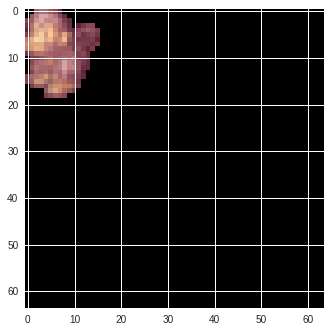

In [5]:
yoyo = matplotlib.image.imread('outputs/yoyo/1/yoyo-1.png')
yoyo = misc.imresize(yoyo, (64, 64))[:,:,0:3]
plt.imshow(yoyo)
plt.show()

#Autoencoder

In [0]:
##### Encoder ##################################################################

class Encoder(torch.nn.Module):
  def __init__(self, nb_filters, nb_layers, nb_blocks, dense, input_size=64):
    super(Encoder, self).__init__()
    self.nb_filters = nb_filters
    self.nb_layers = nb_layers
    self.nb_blocks = nb_blocks
    self.dense = dense
    self.input_size = input_size
    
    def downsampling_block(in_dim, nb_f, nb_l):
      layers = []
      for n in range(nb_l):
        layers.append(torch.nn.Conv2d(in_dim, nb_f, (3, 3), padding=1))
        layers.append(torch.nn.BatchNorm2d(nb_f))
        layers.append(torch.nn.ReLU())
        in_dim = nb_f
      layers.append(torch.nn.MaxPool2d((2, 2), (2, 2)))
      
      return layers
    
    layers = []
    prev_in = 3
    prev_f = self.nb_filters
    
    #Convolutional part
    for n in range(self.nb_blocks):
      layers += downsampling_block(prev_in, prev_f, self.nb_layers)
      prev_in = prev_f
      prev_f *= 2
    
    self.conv = torch.nn.Sequential(*layers)
    
    #Bottleneck
    self.flatten = ((self.input_size//(2**self.nb_blocks))**2) * (prev_f // 2)
    size = (self.input_size//(2**self.nb_blocks))
    self.shape = '{},{},{}'.format(size, size, prev_f // 2)
    self.bottleneck = torch.nn.Linear(self.flatten, dense)
    
    for m in self.modules():
        if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
            torch.nn.init.kaiming_normal(m.weight)
    
  def forward(self, x):
    x = self.conv(x)
    x = x.view(x.size(0), -1)
    x = self.bottleneck(x)
    
    return x

##### Decoder ##################################################################  
    
class Decoder(torch.nn.Module):
  def __init__(self, nb_layers, nb_blocks, dense, encoder_flatten):
    super(Decoder, self).__init__()
    self.nb_layers = nb_layers
    self.nb_blocks = nb_blocks
    self.dense = dense
    self.flatten = [int(s) for s in encoder_flatten.split(',')]
    
    def upsampling_block(in_dim, nb_f, nb_l):
      layers = []
      layers.append(torch.nn.Upsample(scale_factor=2))
      nb_f = in_dim
      next_f = nb_f // 2
      for n in range(nb_l):
        layers.append(torch.nn.Conv2d(nb_f, next_f, (3, 3), padding=1))
        layers.append(torch.nn.BatchNorm2d(next_f))
        layers.append(torch.nn.ReLU())
        nb_f = next_f
        
      return layers
    
    #Latent part
    flat = self.flatten[0] * self.flatten[1] * self.flatten[2]
    self.bottleneck = torch.nn.Linear(self.dense, flat)
    
    #Deconvolutional part
    layers = []
    prev_f = self.flatten[2]
    for n in range(self.nb_blocks):
      next_f = prev_f // 2
      layers += upsampling_block(prev_f, next_f, self.nb_layers)
      prev_f //= 2
    layers.append(torch.nn.Conv2d(next_f, 3, (3, 3), padding=1)) #Add a last conv layer
    self.deconv = torch.nn.Sequential(*layers)
    
    for m in self.modules():
        if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
            torch.nn.init.kaiming_normal(m.weight)
    
  def forward(self, x):
    x = self.bottleneck(x)
    x = x.view(-1, self.flatten[2], self.flatten[0], self.flatten[1])
    x = self.deconv(x)

    return x

#Data Processing

In [0]:
def preprocess(x):
  x = x.permute(0, 3, 1, 2)
  x = (x - 127.5) / 127.5
  
  return x
  
def deprocess(x):
  x = x.permute(0, 2, 3, 1)
  x = (x + 1) * 0.5
  
  return x

#Visualization

In [0]:
def plot_learning(loss):
  plt.clf()
  plt.plot(list(range(len(loss))), loss, c='r')
  plt.show()

def show_image(x):
  plt.clf()
  ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
  ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
  ax3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
  ax4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)
  ax1.imshow(x[0])
  ax2.imshow(x[1])
  ax3.imshow(x[2])
  ax4.imshow(x[3])
  plt.show()
  
def show_example(x, y):
  plt.clf()
  x = np.clip(x, 0, 1)
  y = np.clip(y, 0, 1)
  ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
  ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)
  ax1.imshow(x)
  ax2.imshow(y)
  plt.show()
  
def plot_interpolations(x):
  plt.clf()
  x = np.clip(x, 0, 1)
  print(x.shape)
  for i in range(11):
    ax1 = plt.subplot2grid((1, 11), (0, i), rowspan=1, colspan=1)
    ax1.imshow(x)
  plt.show()

#Variables

In [14]:
#Constants
# learning_rate = 0.0002
# epoch = 2000
# batch_size = 32
# nb_f = 64
# nb_block = 2
# nb_layer = 2
# latent_size = 512
# img_size = 128
learning_rate = 0.001
epoch = 2000
batch_size = 32
nb_f = 64
nb_block = 3
nb_layer = 3
latent_size = 128
img_size = 128

#Model
encoder = Encoder(nb_f, nb_layer, nb_block, latent_size, input_size=img_size)
encoder = encoder.cuda()
decoder = Decoder(nb_layer, nb_block, latent_size, encoder.shape)
decoder = decoder.cuda()
print(encoder)
print(decoder)
loss_function = torch.nn.MSELoss()
e_optimizer = torch.optim.Adam(encoder.parameters(), learning_rate)
d_optimizer = torch.optim.Adam(decoder.parameters(), learning_rate)

#Datasets
with open('img_list', 'r') as f:
  dataset = f.read()
dataset = dataset.split('\n')[:-1]
print(dataset)

Encoder(
  (conv): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU()
    (6): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (12): ReLU()
    (13): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (15): ReLU()
    (16): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): BatchNorm2d(128, eps=1e-

#Train

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Epoch 0, Loss = 0.015965937143933455


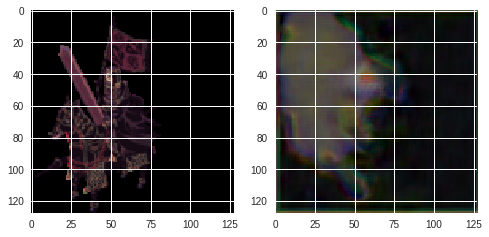

In [0]:
hist_loss = []

for e in range(epoch):
  #Training
  running_loss = 0
  random.shuffle(dataset)
  for it in range(len(dataset) // batch_size):
    batch_idx = dataset[it * batch_size:(it * batch_size) + batch_size]
    batch = []
    for b in batch_idx:
      img = matplotlib.image.imread(b)
      img = misc.imresize(img, (img_size, img_size))[:,:,0:3]
      batch.append(img)
    data = np.array(batch)
    data = Variable(preprocess(torch.from_numpy(data).float().cuda()))
    e_optimizer.zero_grad()
    d_optimizer.zero_grad()
    latents = encoder(data)
    logits = decoder(latents)
    loss = loss_function(logits, data)
    loss.backward()
    d_optimizer.step()
    e_optimizer.step()
    running_loss += loss.data[0]
  hist_loss.append(running_loss / len(dataset))
  
  if e % 10 == 0:  
    print('Epoch {}, Loss = {}'.format(e, hist_loss[-1]))
    #plot_learning(hist_loss)
    truth = deprocess(data).data.cpu().numpy()
    pred = deprocess(logits).data.cpu().numpy()
    show_example(truth[0], pred[0])

#Interpolation

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


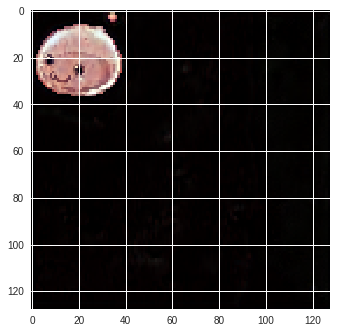

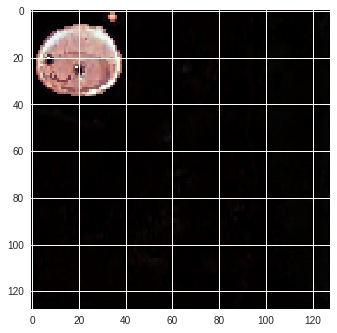

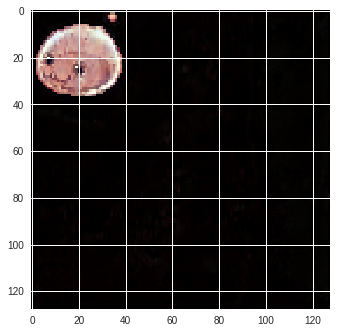

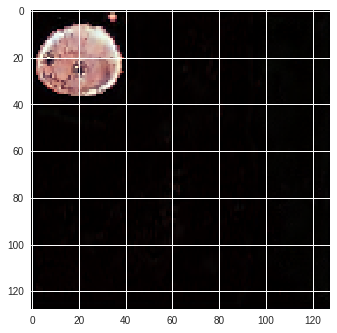

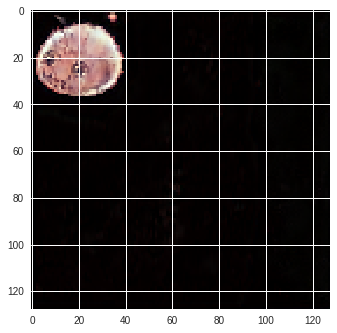

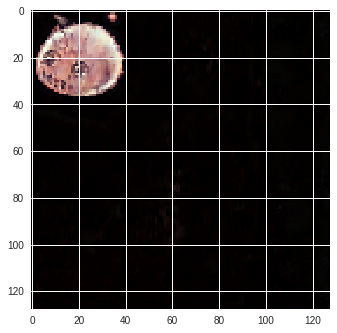

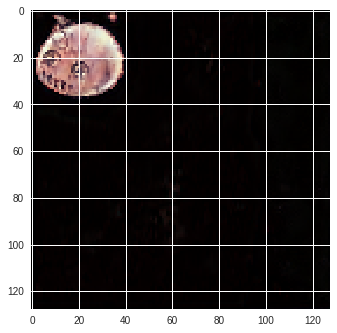

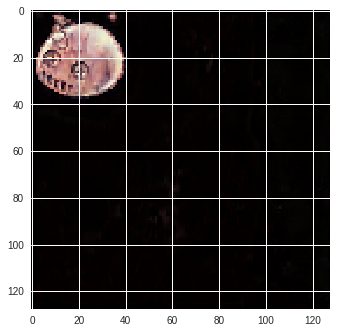

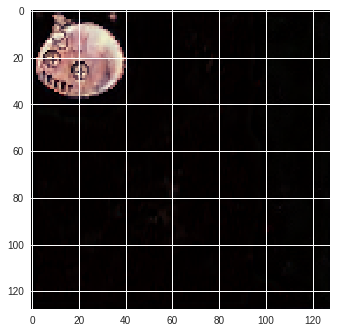

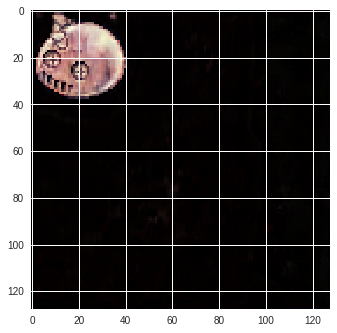

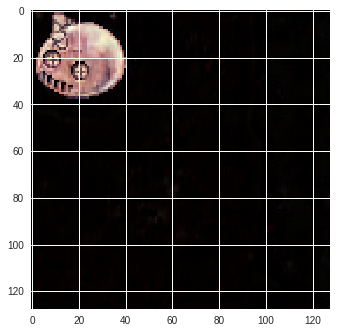

In [11]:
def plot_interpolations(x):
  plt.clf()
  x = np.clip(x, 0, 1)
  for i in range(11):
    ax1 = plt.subplot2grid((1, 11), (0, i), rowspan=1, colspan=1)
    ax1.imshow(x[i])
  plt.show()

image1 = 'outputs/poring/1/poring-1.png'
image2 = 'outputs/metaling/1/metaling-1.png'

#Get latent codes
image1 = matplotlib.image.imread(image1)
image1 = misc.imresize(image1, (img_size, img_size))[:,:,0:3]
image2 = matplotlib.image.imread(image2)
image2 = misc.imresize(image2, (img_size, img_size))[:,:,0:3]
x = np.array([image1, image2])
x = Variable(preprocess(torch.from_numpy(x).float().cuda()))
z = encoder(x)
img = decoder(z)
z1, z2 = z[0], z[1]

#Interpolate
coeff = np.arange(0, 1.1, 0.1)
interpolations = []
for p in coeff:
  z = z1 * (1 - p) + z2 * p
  img = decoder(z)
  img = deprocess(img)
  img = img[0].cpu().data.numpy()
  img = np.clip(img, 0, 1)
  plt.imshow(img)
  plt.show()
#   interpolations.append(img[0].cpu().data.numpy())
# plot_interpolations(np.array(interpolations))